## Algo Trading là gì? Ứng dụng Algo Trading trong phân tích tâm lí thị trường

*Các khái niệm về <strong>Algo Trading (giao dịch thuật toán)</strong> và <strong>Quantitative Trading (giao dịch định lượng)</strong> đã rất phát triển trên thế giới. Nhưng, các khái niệm này lại còn khá mới ở Việt Nam.
Bài viết này nói về một khía cạnh nhỏ của Algo Trading và áp dụng một thư viện phổ thông trên thế giới vào dự báo đầu tư.*

<strong>Giao dịch thuật toán ([Algorithmic Trading](https://en.wikipedia.org/wiki/Algorithmic_trading))</strong> là qui trình áp dụng các thuật toán Machine Learning để thiết lập các giao dịch tự động hoặc đưa ra khuyến nghị giao dịch. (trước trước khi Machine Learning trở nên mạnh mẽ, Algo trading định nghĩa là áp dụng chuỗi các quy tắc tự động trong đầu tư) 

Trong thế kỷ 21, giao dịch thuật toán (Algorithmic Trading) thu hút được sự quan tâm chung của cả trader khối bán lẻ lẫn tổ chức. Nó được sử dụng rộng rãi bởi các ngân hàng đầu tư, quỹ hưu trí, quỹ tương hỗ và quỹ đầu cơ. Algorithmic Trading có thể thực hiện một lệnh lớn hơn hoặc thực hiện các giao dịch nhanh đến mức con người không kịp phản ứng. 

Một nghiên cứu vào năm 2019 cho thấy khoảng 92% giao dịch trên thị trường Forex được thực hiện bởi các thuật toán giao dịch chứ không phải con người. (Source: Wikipedia [Algorithmic Trading](https://en.wikipedia.org/wiki/Algorithmic_trading))

#### Biểu đồ gia tăng khối lượng giao dịch bằng Algo Trading trên thị trường

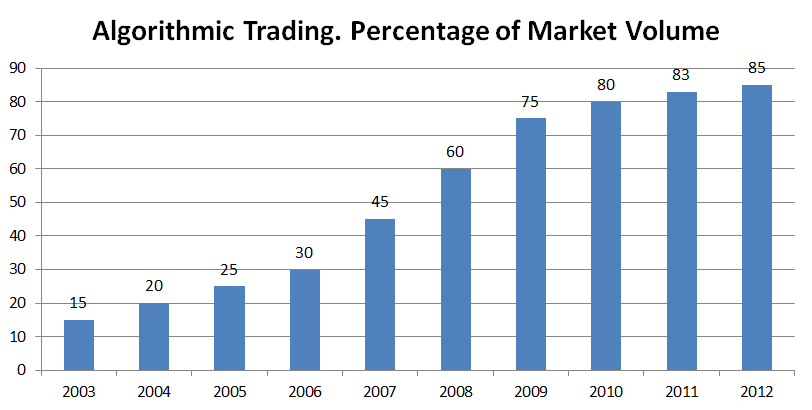

In [15]:
import IPython
url = 'https://upload.wikimedia.org/wikipedia/commons/5/51/Algorithmic_Trading._Percentage_of_Market_Volume.png'
IPython.display.Image(url)

#### Nền tảng bài viết dựa trên áp dụng thư viện VADER vào Sentiment Analysis

<strong>Ý tưởng của bài viết là gì? </strong>

Ý tưởng: Crawling tin tức liên quan đến đầu tư Vàng trên một trang tổng hợp các nguồn báo, sau đó áp dụng thư viện `VADER` được tích hợp sẵn trong toolkit xử lí ngôn ngữ tự nhiên `nltk` để dự báo tâm lí thị trường lên giá Vàng.

<strong>Sentiment Analysis là gì? </strong>

Sentiment Analysis là quá trình 'tính toán' xác định xem nội dung bài viết là tích cực, tiêu cực hay trung lập.

Trong kinh doanh: Các công ty sử dụng nó để tìm hiều thái độ mọi người phản ứng với các chiến dịch hoặc buổi ra mắt sản phẩm của họ và tại sao người tiêu dùng không mua một số sản phẩm. (như phân tích cảm xúc trong bình luận mua hàng trên `TIKI` chẳng hạn)

Trong lĩnh vực chính trị: nó được sử dụng để theo dõi quan điểm chính trị, để phát hiện sự nhất quán và không nhất quán giữa các tuyên bố và hành động ở cấp chính phủ. Nó cũng có thể được sử dụng để dự đoán kết quả bầu cử! .

Trong khuôn khổ bài viết này sẽ giới thiệu Sentiment Analysis ứng dụng trong phân tích cảm xúc tin tức & ứng dụng vào đầu tư.

<strong>Thư viện `VADER` là gì? </strong>

Đọc thêm về VADER Sentiment Analysis: https://blog.quantinsti.com/vader-sentiment/

VADER (Valence Aware Dictionary and sEntiment Reasoner) là một thuật toán phân tích trạng thái cảm xúc thể hiện trên nội dung bài viết. Vader có mã nguồn mở theo MIT License.

<strong>Vì sao không áp dụng lên chứng khoán Việt Nam, cụ thể một mã cổ phiếu nào đó? </strong>

Bởi vì thư viện VADER được train trên dữ liệu tiếng anh, nếu muốn build công cụ tương tự phải thiết lập lại Sentiment Analysis cho các tin tức tiếng việt. Hi vọng sẽ trình bày trong một bài viết khác

<strong>Quy trình thực hiện như thế nào? </strong>

1. Crawling dữ liệu bằng thư viện phổ thông `BeautifulSoup` 
2. Trích xuất thông tin
3. applied VADER

<strong>Sử dụng nguồn data nào trong bài viết? </strong>

Nguồn data dùng trong bài viết: https://finviz.com/

FINVIZ là một platform tổng hợp thông tin thị trường chứng khoán thế giới, khá tương đồng các platform như FinTrade tại Việt Nam. Platform cung cấp các data cổ phiếu , ngoại hối và hợp đồng tương lai như: tin tức, các công cụ trực quan biểu đồ, theo dõi danh mục đầu tư, và các loại tool filter khác ...

### PHASE 1: Crawling dữ liệu tin tức

In [1]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.sentiment.vader import SentimentIntensityAnalyzer
finwiz_url = 'https://finviz.com/quote.ashx?t='

In [2]:
news_tables = {}
tickers = ['GOLD']
for ticker in tickers:
    url = finwiz_url + ticker
    req = Request(url=url,headers={'user-agent': 'my-app/0.0.1'}) 
    response = urlopen(req) 
    html = BeautifulSoup(response)
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table

In [3]:
amzn = news_tables['GOLD']
amzn_tr = amzn.findAll('tr')
for i, table_row in enumerate(amzn_tr):
    a_text = table_row.a.text
    td_text = table_row.td.text
    print(td_text,' - ',a_text)
    if i == 30:
        break

Dec-13-20 01:08AM    -  How Much Of Barrick Gold Corporation (TSE:ABX) Do Institutions Own?
Dec-08-20 01:43PM    -  Gold Price Pans For A Bottom As Coronavirus Vaccines Near, But This Is Key
Dec-07-20 10:40PM    -  Why Shares of Barrick Gold Plunged 13% in November
10:49AM    -  Is Barrick (GOLD) A Good Stock To Buy Now?
Dec-05-20 11:32AM    -  Why Is Barrick Gold (GOLD) Down 19.9% Since Last Earnings Report?
Dec-03-20 12:11AM    -  12 Best Silver Stocks to Buy Now
Dec-01-20 12:44PM    -  A death cross is slowly forming in gold prices, even as futures rise Tuesday
08:41AM    -  Rising Gold Prices Aid Royal Gold (RGLD) Amid Coronavirus Woes
Nov-30-20 01:51PM    -  Loncor Reports Multiple Gold Intercepts in First Hole at its Flagship Adumbi Deposit
Nov-27-20 02:42PM    -  3 Dividend Gold Stocks
Nov-26-20 10:00AM    -  Barrick listed again in Dow Jones Sustainability Index
Nov-25-20 03:59PM    -  Gold prices snap 2-session skid on Thanksgiving eve, but head for weekly loss
Nov-24-20 08:37

### PHASE 2: Tách thời gian & content

In [4]:
parsed_news = []
for file_name, news_table in news_tables.items():
    for x in news_table.findAll('tr'):
        text = x.a.get_text() 
        date_scrape = x.td.text.split()
        if len(date_scrape) == 1:
            time = date_scrape[0] 
        else:
            date = date_scrape[0]
            time = date_scrape[1]
        ticker = file_name.split('_')[0]
        parsed_news.append([ticker, date, time, text])  

In [5]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Hieu
[nltk_data]     Le\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### PHASE 3: Applied thư viện VADER

The VADER library có 4 feature được giải thích như sau:
1. `pos`: Xác xuất tích cực của thị trường (positive)
2. `neu`: Xác xuất trung tính của thị trường (neutral)
3. `neg`: Xác xuất tiêu cực của thị trường (negative)
4. `compound`: Chuẩn hóa điểm kết hợp của pos - neg - neu, có thang điểm từ -1 đến 1

In [6]:
vader = SentimentIntensityAnalyzer()
columns = ['ticker', 'date', 'time', 'headline']
parsed_and_scored_news = pd.DataFrame(parsed_news, columns=columns)
scores = parsed_and_scored_news['headline'].apply(vader.polarity_scores).tolist()
scores_df = pd.DataFrame(scores)
parsed_and_scored_news = parsed_and_scored_news.join(scores_df, rsuffix='_right')
parsed_and_scored_news['date'] = pd.to_datetime(parsed_and_scored_news.date).dt.date
parsed_and_scored_news.head(10)

,ticker,date,time,headline,neg,neu,pos,compound
0,GOLD,2020-12-13,01:08AM,How Much Of Barrick Gold Corporation (TSE:ABX)...,0.000,1.000,0.000,0.0000
1,GOLD,2020-12-08,01:43PM,Gold Price Pans For A Bottom As Coronavirus Va...,0.000,1.000,0.000,0.0000
2,GOLD,2020-12-07,10:40PM,Why Shares of Barrick Gold Plunged 13% in Nove...,0.000,0.784,0.216,0.2960
3,GOLD,2020-12-07,10:49AM,Is Barrick (GOLD) A Good Stock To Buy Now?,0.000,0.707,0.293,0.4404
4,GOLD,2020-12-05,11:32AM,Why Is Barrick Gold (GOLD) Down 19.9% Since La...,0.000,1.000,0.000,0.0000
5,GOLD,2020-12-03,12:11AM,12 Best Silver Stocks to Buy Now,0.000,0.588,0.412,0.6369
6,GOLD,2020-12-01,12:44PM,A death cross is slowly forming in gold prices...,0.245,0.755,0.000,-0.5994
7,GOLD,2020-12-01,08:41AM,Rising Gold Prices Aid Royal Gold (RGLD) Amid ...,0.244,0.756,0.000,-0.4404
8,GOLD,2020-11-30,01:51PM,Loncor Reports Multiple Gold Intercepts in Fir...,0.000,0.896,0.104,0.1027
9,GOLD,2020-11-27,02:42PM,3 Dividend Gold Stocks,0.000,1.000,0.000,0.0000


### Trực quan kết quả phân tích tâm lí thị trường

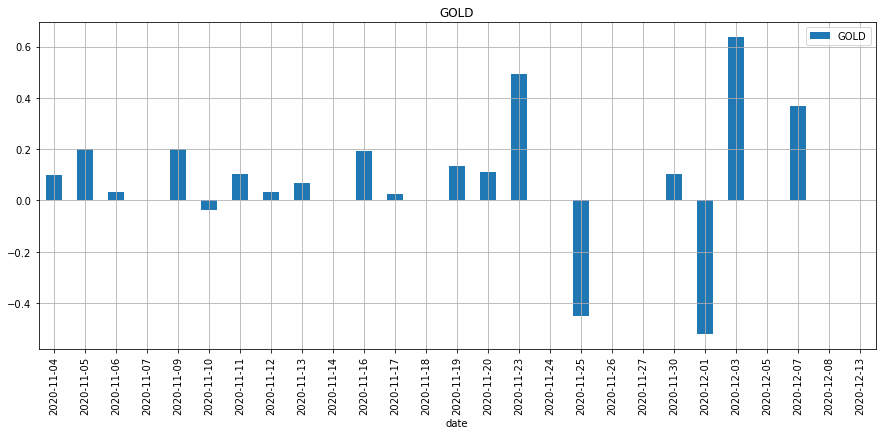

In [7]:
plt.rcParams['figure.figsize'] = [15, 6]
mean_scores = parsed_and_scored_news.groupby(['ticker','date']).mean()
mean_scores = mean_scores.unstack()
mean_scores = mean_scores.xs('compound', axis="columns").transpose()
mean_scores.plot(kind = 'bar',subplots=True)
plt.grid()